<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/tutorial/October_3rd_tutorial_4th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [13]:
# Step 1: Import Libraries and Generate Data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.style.use('seaborn-whitegrid')

# Set random seed for reproducibility
data = np.random.RandomState(10032024)

# Generate random 3D data
X = np.dot(data.rand(3, 3), data.randn(3, 500)).T

<ipython-input-13-4f2f106f36f7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


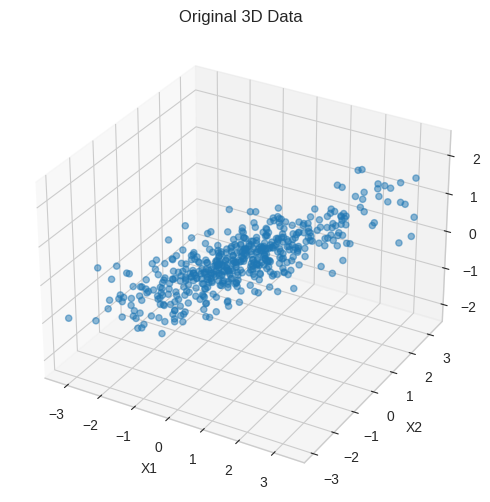

In [8]:
# Step 2: Visualize the 3D Data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.5)
ax.set_title('Original 3D Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.show()

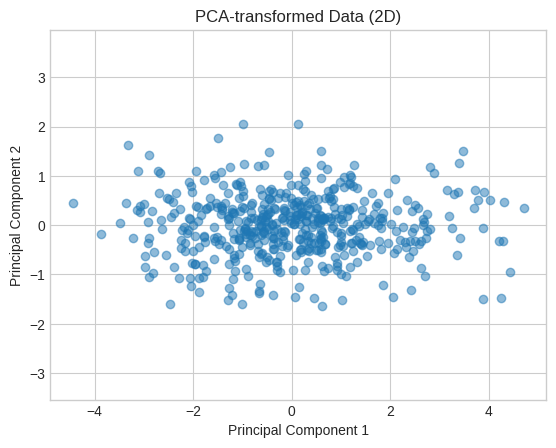

Explained variance ratios: [0.86838188 0.12890871]


In [14]:
# Step 3: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Plot the reduced 2D data after PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.axis('equal')
plt.title('PCA-transformed Data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 5: Print explained variance ratios to understand the contribution of each component
print(f'Explained variance ratios: {pca.explained_variance_ratio_}')

# ICA

In [32]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.stats import pearsonr

# Step 2: Generate non-Gaussian signals
np.random.seed(2312312)
n_samples = 50
time = np.linspace(0, 8 * np.pi, n_samples)

# Generate non-Gaussian signals
S = np.array([
    np.sign(np.sin(2 * time)),              # Square wave
    np.sign(np.cos(3 * time)),              # Square wave
    np.random.laplace(size=n_samples),      # Laplace distribution
    np.random.exponential(size=n_samples),  # Exponential distribution
    np.random.uniform(-1, 1, size=n_samples),  # Uniform distribution
    np.sin(5 * time),                       # Sine wave (for contrast)
    np.random.binomial(1, 0.5, size=n_samples) - 0.5,  # Bernoulli distribution
    np.sign(np.cos(5 * time)),              # Square wave
    np.random.poisson(3, size=n_samples) - 3,  # Centered Poisson distribution
    np.sin(7 * time)                        # Sine wave (for contrast)
])

# Center the signals
S -= np.mean(S, axis=1, keepdims=True)

# Normalize the signals to unit variance
S /= np.std(S, axis=1, keepdims=True)

# Step 3: Mix the signals
A = np.random.randn(10, 10)  # Random mixing matrix
X = np.dot(A, S)  # Mixed signals

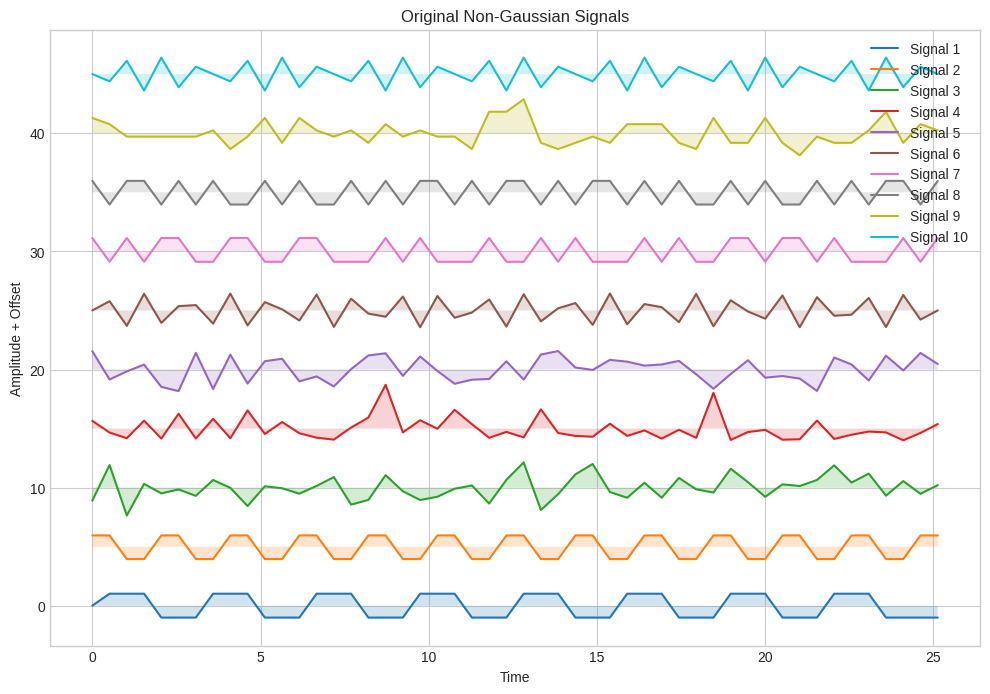

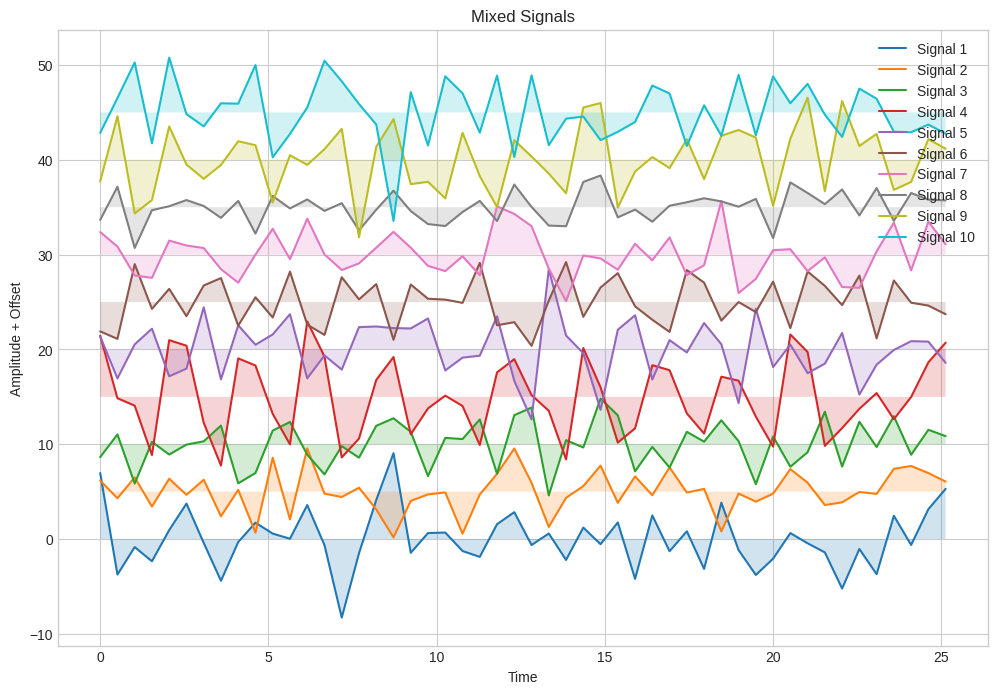

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


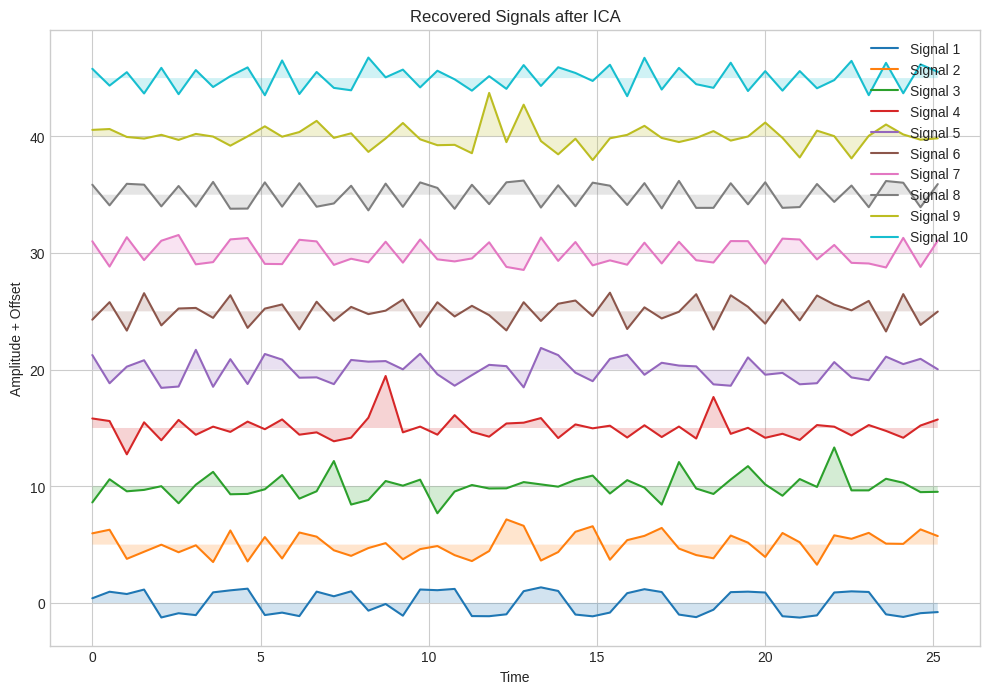

Correlation coefficients between original and recovered signals:
Signal 1: 0.9766
Signal 2: 0.5934
Signal 3: 0.5245
Signal 4: 0.8418
Signal 5: 0.8729
Signal 6: 0.8834
Signal 7: 0.9756
Signal 8: 0.9879
Signal 9: 0.6853
Signal 10: 0.8825


In [33]:
# Define the plotting function
def plot_cascading_signals(signals, time, title, offset=3):
    plt.figure(figsize=(12, 8))
    for i, signal in enumerate(signals):
        plt.plot(time, signal + i * offset, label=f'Signal {i+1}')
        plt.fill_between(time, i * offset, signal + i * offset, alpha=0.2)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude + Offset')
    plt.legend(loc='upper right')
    plt.show()

# Plot original signals in cascading plot
plot_cascading_signals(S, time, 'Original Non-Gaussian Signals', offset=5)

# Plot mixed signals in cascading plot
plot_cascading_signals(X, time, 'Mixed Signals', offset=5)

# Step 4: Perform ICA
ica = FastICA(n_components=10, max_iter=1000, random_state=0)
S_recovered = ica.fit_transform(X.T)  # Reconstruct signals
A_estimated = ica.mixing_  # Get estimated mixing matrix

# Step 5: Match the recovered signals to the original signals
corr_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        corr_coef, _ = pearsonr(S[i], S_recovered[:, j])
        corr_matrix[i, j] = abs(corr_coef)

# Find the best match for each original signal
max_corr_indices = np.argmax(corr_matrix, axis=1)
S_recovered_ordered = S_recovered[:, max_corr_indices]

# Adjust the sign of the recovered signals
for i in range(10):
    corr_coef = np.corrcoef(S[i], S_recovered_ordered[:, i])[0, 1]
    if corr_coef < 0:
        S_recovered_ordered[:, i] *= -1

# Plot recovered signals in cascading plot
plot_cascading_signals(S_recovered_ordered.T, time, 'Recovered Signals after ICA', offset=5)

# Optional: Print correlation coefficients
print("Correlation coefficients between original and recovered signals:")
for i in range(10):
    corr_coef = np.corrcoef(S[i], S_recovered_ordered[:, i])[0, 1]
    print(f"Signal {i+1}: {corr_coef:.4f}")